<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_10/CS166_PCW_Session_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random walk with drift

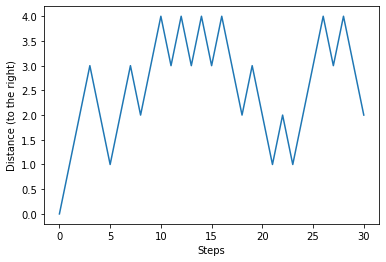

None


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(3)
class Coin:
    HEAD = "head"
    TAIL = "tail"
    def __init__(self, p_head):
        self.p_head = p_head
    
    def toss_coin(self):
        return self.HEAD if random.random() < self.p_head else self.TAIL

    def random_walk(self, steps):
        dist_arr = [0]
        dist = 0
        for i in range(steps):
            if self.toss_coin() == self.HEAD:
                dist_arr.append(dist_arr[-1] + 1)
                dist += 1
            else:
                dist_arr.append(dist_arr[-1] - 1)
                dist -= 1
        return dist_arr, dist

    def plot_random_walk(self, steps):
        dist_arr, final_dist = self.random_walk(steps)
        plt.plot(dist_arr)
        plt.xlabel("Steps")
        plt.ylabel("Distance (to the right)")
        plt.show()
        


bias_coin = Coin(0.6)
print(bias_coin.plot_random_walk(30))

In [ ]:


def sample(n = 200, steps = 30, p_head = 0.6):
    coin = Coin(p_head)
    dist_arr = []
    for rep in range(n):
        dist = coin.random_walk(steps)[1]
        dist_arr.append(dist)
    
    mean = np.mean(dist_arr)
    var = np.var(dist_arr)
    plt.hist(dist_arr)
    
    plt.title(f"Histogram of distance travel after {n} random walks, with head probability = {p_head}")
    plt.ylabel("Frequency")
    plt.xlabel("Distance")
    plt.show()

    return mean, var


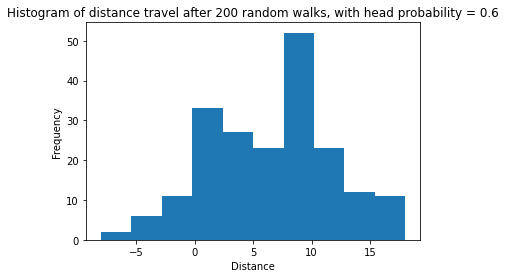

Simulated sample mean: 6.58, variance: 29.303600000000003


In [ ]:
mean, var = sample()
print(f"Simulated sample mean: {mean}, variance: {var}")

Theoretical expected value = 0.6 * 30 - 0.4 * 30 = 6

Theoretical variance = 0

## Gambler's ruin with time limit

[10, 9, 10, 9, 8, 7, 6, 7, 8, 9, 10, 9, 10, 9, 10, 9, 10, 11, 10, 11, 10, 9, 10, 11, 12, 13, 12, 11, 10, 11, 12, 13, 12, 13, 12, 13, 14, 13, 14, 13, 12, 13, 12, 11, 10, 11, 10, 11, 10, 9, 8, 9, 10, 11, 12, 13, 14, 13, 12, 11, 10, 9, 8, 7, 6, 7, 8, 7, 6, 7, 6, 7, 8, 7, 6, 5, 6, 5, 4, 3, 2, 3, 4, 3, 4, 5, 4, 3, 4, 3, 2, 1, 0]
[10, 11, 10, 11, 12, 13, 14, 13, 14, 13, 14, 15, 16, 17, 18, 19, 18, 17, 18, 17, 18, 19, 18, 17, 18, 17, 16, 17, 16, 17, 18, 19, 18, 19, 20, 19, 18, 19, 20, 19, 18, 17, 16, 15, 14, 13, 12, 13, 12, 11, 12, 13, 14, 15, 16, 15, 14, 15, 16, 15, 16, 17, 16, 17, 16, 15, 14, 13, 12, 13, 14, 13, 12, 13, 14, 13, 14, 13, 12, 11, 12, 11, 10, 11, 10, 9, 10, 9, 8, 7, 6, 7, 8, 7, 8, 7, 6, 7, 8, 7, 6, 7, 8, 9, 10, 9, 10, 11, 12, 11, 10, 11, 10, 9, 10, 11, 10, 9, 10, 9, 8, 7, 6, 7, 8, 7, 8, 9, 8, 9, 8, 7, 8, 9, 8, 7, 6, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 6, 7, 6, 7, 8, 7, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6, 5, 6, 5, 4, 3, 4, 5, 6, 7, 8, 9, 8, 9, 10, 9

(20843.70976253298, 469286181.4118045)

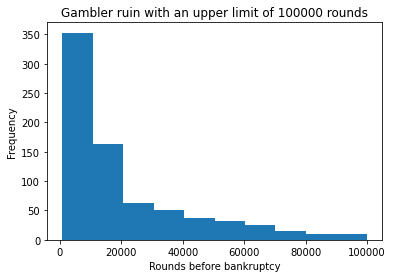

In [ ]:
def gambler_ruin(limit, gambler, house):
    gambler_fortunes = [gambler]
    while gambler_fortunes[-1] > 0 and gambler_fortunes[-1] < (gambler + house):
        if limit and len(gambler_fortunes) == limit:
            break
        w = random.choice([-1, 1])
        gambler_fortunes.append(gambler_fortunes[-1] + w)
    return gambler_fortunes

print(gambler_ruin(limit = 100, gambler = 10, house = 200))
print(gambler_ruin(limit = None, gambler = 10, house = 200))

def simulate_gambler_ruin(reps = 1000, limit = 100000, gambler = 100, house = 2000):
    bankruptcy = []
    for i in range(reps):
        arr = gambler_ruin(limit, gambler, house)
        #only counts cases where gambler loses
        if arr[-1] == 0:
            bankruptcy.append(len(arr))
    plt.hist(bankruptcy)
    plt.xlabel("Rounds before bankruptcy")
    plt.ylabel("Frequency")
    plt.title(f"Gambler ruin with an upper limit of {limit} rounds")
    return np.mean(bankruptcy), np.var(bankruptcy)


simulate_gambler_ruin()

(138535.03375527426, 153278072627.8385)

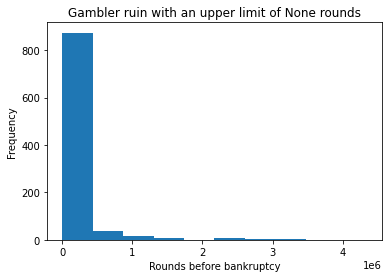

In [ ]:
simulate_gambler_ruin(limit = None)

We can see that compares to the gambler ruin with no limits, the gambler ruin with limits have a smaller mean (because we cut off it earlier) and smaller variance (again, due to the cut-off)
